In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras import Model

In [4]:
(x_train, _) , (x_test, _) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [7]:
x_train = x_train.astype("float")/255.
x_test = x_test.astype("float")/255.

In [21]:
class Autoencoder(Model):
    def __init__(self, dimension):
        super().__init__()
        self.dim = dimension
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(dimension, activation="relu"),
#             tf.keras.layers.Reshape((28,28))
        ])
        
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(784, activation="sigmoid"),
            tf.keras.layers.Reshape((28,28))
        ])
    def call(self, x):
        encoded = self.encoder(x)
        # x will be of form tensor 
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(64)

In [22]:
autoencoder.compile(optimizer="adam", loss=tf.keras.losses.MeanSquaredError())

In [23]:
autoencoder.fit(x_train, x_train, epochs=10, shuffle=True, validation_data = (x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.0398 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0122 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0

In [30]:
encoded_imgs = autoencoder.encoder(x_test).numpy()

In [31]:
encoded_imgs.shape

(10000, 64)

In [32]:
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [33]:
decoded_imgs.shape

(10000, 28, 28)

In [34]:
type(decoded_imgs)

numpy.ndarray

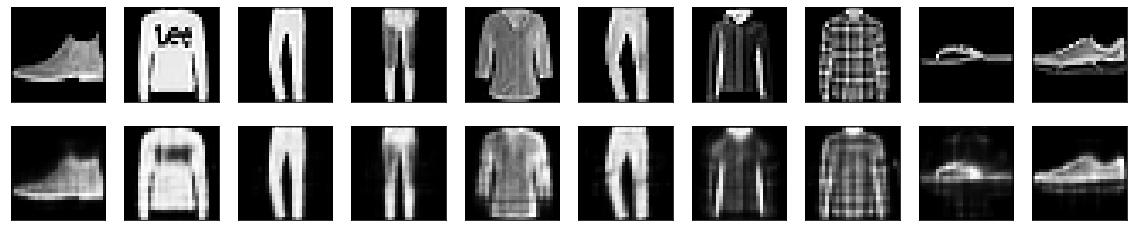

In [36]:
n = 10
plt.figure(figsize=(20,4))
for i  in range(n):
    # original Image
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    
    
    # reconstructed images
    ax = plt.subplot(2, n, n+i+1)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)   